# Grupo 

Beatriz Duque - 31906621

Felipe Pinho - 31958982

Patrick Parizotti - 31962815 

> _Opção 2: Escolher um tópico da disciplina que não foi abordado em aula e criar um
notebook Jupyter contendo um tutorial com a parte teórica sobre o tópico escolhido e
uma parte prática (exemplo de implementação)_

*** 

### Proposta do grupo
_Criar um tutorial Jupyter Notebook que simulará a plotagem de uma curva de luz de
uma Estrela, dado um ou mais Planetas que orbitam essa estrela.
A proposta é pesquisar qual seria a melhor biblioteca para fazer a plotagem gráfica 3D
da matriz Estrela e simular a órbita do planeta de forma visual._

### Arquivos auxiliares 

``` estrela_nv1.py ``` : Arquivo com classe que modela a estrela (matriz)

``` eclipse_nv1.py ``` : Arquivo com classe que cria o planeta e calcula sua órbita dada a estrela

``` verify.py ``` : Arquivo com funções auxiliares para conversão de valores


_ _ _ _ _ 
## O que é o método de trânsito?

Um planeta em órbita de uma estrela, pode eclipsá-la caso a configuração da órbita e observador seja propícia. Ao passar em frente à estrela, o planeta causará um diminuto decréscimo no brilho da estrela (Figura 1). Estas pequenas variações, de no máximo alguns porcentos, causadas na curva de luz da estrela possibilitam a detecção de planetas e é conhecido como o método de trânsito.
O método de trânsito planetário permite a análise da curva de luz gerada por uma estrela com um planeta a eclipsá-la. Para isso, é necessário que o plano orbital do planeta esteja quase perpendicular ao plano do céu. Também é mais provável a detecção se o planeta orbitar a estrela em um período razoavelmente curto (geralmente períodos de 10 dias ou menos). Assim, o trânsito ocorrerá mais de uma vez facilitando a confirmação que o objeto em trânsito ao redor da estrela orbitada realmente se trata de um planeta. (Perryman, 2011)

<p class="aligncenter">
    <img src="figura1.png" alt="centered image" />
</p>
<style>
.aligncenter {
    text-align: center;
}
</style>

> ###### Figura 1: Trânsito de um planeta em torno de estrela hospedeira e o decréscimo no brilho da estrela evidente em sua curva de luz. Fonte: (Metodos para a deteção de exoplanetas, s.d.)

A partir da análise de trânsitos planetários observados na curva de luz, é possível obter o período do trânsito, ângulo de inclinação da órbita planetária, distância entre o planeta e a estrela e o raio do planeta. Logo, com o ajuste preciso da curva de luz, diversos parâmetros do planeta e a sua órbita podem ser extraídos, o que contribui para estudos acerca da formação e composição planetária.


_ _ _ _ _ 
## Motivação do projeto 

> É muito interessante que pessoas que não conhecem assuntos referentes à busca por Exoplanetas entendam um pouco como funciona todo o processo. Além disso, é importante que estudiosos iniciantes ou interessados pela área consigam estudar de forma prática, e com isso, o recurso visual de uma órbita planetária ao redor de sua Host Star pode ser uma grande facilitadora. 

### Bibliotecas necessárias

In [1]:
# Importacao de bibliotecas necessarias 
import numpy as np
from matplotlib import pyplot
from estrela_nv1 import estrela
from eclipse_nv1 import Eclipse
from verify import Validar,ValidarEscolha,calSemiEixo,calculaLat

### Criação da estrela

`parâmetro raio::` raio da estrela em pixel

`parâmetro intensidadeMaxima::` intensidade da estrela que sera plotada 

`parâmetro tamanhoMatriz::` tamanho em pixels da matriz estrela

`parâmetro raioStar::`raio da estrela em relação ao raio do sol

`parâmetro coeficienteHum::` coeficiente de escurecimento de limbo 1 (u1)

`parâmetro coeficienteDois::` coeficiente de escurecimento de limbo 2 (u2)

`objeto estrela_ ::` é o objeto estrela onde é guardada a matriz estrela de acordo com os parâmetros. Chamadas das funções da classe estrela são feitas através dele

`parâmetro estrela ::` variavel que recebe o objeto estrela 


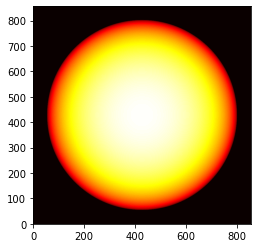

In [2]:
# Adicionar dados da estrela


raio = 373. #default (pixel)
intensidadeMaxima = 240 #default
tamanhoMatriz = 856 #default
raioStar = 0.117 #raio da estrela em relacao ao raio do sol
raioStar = raioStar*696340 #multiplicando pelo raio solar em Km 
coeficienteHum = 0.65
coeficienteDois = 0.28
ecc = 0
anom = 0

#cria estrela
estrela_ = estrela(raio,intensidadeMaxima,coeficienteHum,coeficienteDois,tamanhoMatriz)

Nx = estrela_.getNx() #Nx e Ny necessarios para a plotagem do eclipse
Ny = estrela_.getNy()
dtor = np.pi/180.  


estrela = estrela_.getEstrela()
#para plotar a estrela 
#caso nao queira plotar a estrela, comentar linhas abaixo
estrela_.Plotar(tamanhoMatriz,estrela)



### Criação do planeta
`parâmetro periodo::` periodo de órbita do planeta em dias 

`parâmetro anguloInclinacao::` ângulo de inclinação do planeta em graus

`parâmetro semieixoorbital::` semi-eixo orbital do planeta

`parâmetro semiEixoRaioStar::` conversão do semi-eixo orbital em relação ao raio da estrela 

`parâmetro raioPlanetaRstar::` conversão do raio do planeta em relação ao raio de Júpiter para em relação ao raio da estrela


In [ ]:
# Adicionar dados do planeta 
# Trappist 1-C
periodo = 6.099 # em dias
anguloInclinacao = 89.86  # em graus
semiEixoRaioStar = 0.028
semiEixoRaioStar = ((1.469*(10**8))*semiEixoRaioStar)/raioStar # em unidades de Rstar
#multiplicando pelas UA (transformando em Km) e convertendo em relacao ao raio da estrela 
raioPlanetaRstar = 0.0819 #em relação ao raio de jupiter
raioPlanetaRstar = (raioPlanetaRstar*69911)/raioStar #multiplicando pelo raio de jupiter em km 

eclipse = Eclipse(Nx,Ny,raio,estrela)
estrela_.Plotar(tamanhoMatriz,estrela)
eclipse.geraTempoHoras()
tempoHoras=eclipse.getTempoHoras()


### Criação do Eclipse

`parâmetro eclipse::` variavel que guarda o objeto da classe eclipse que gera a curva de luz. Chamadas das funções da classe Eclipse () são feitas através dele. 

`parâmetro tempoTransito::` tempo do transito do planeta 

`parâmetro curvaLuz::` matriz curva de luz que sera plotada em forma de grafico 

`parâmetro tempoHoras::` tempo do transito em horas

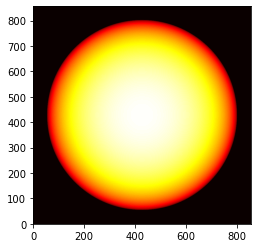


Aguarde um momento, a animacao do trânsito está sendo gerada.

Tempo Total (Trânsito): 2.747683299629874


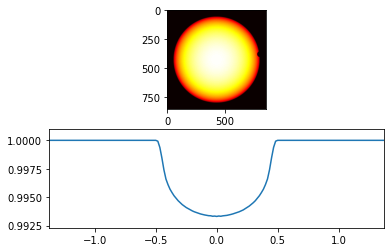

In [4]:
#eclipse
eclipse.criarEclipse(semiEixoRaioStar, raioPlanetaRstar,periodo,anguloInclinacao,False,ecc,anom)
print ("Tempo Total (Trânsito):",eclipse.getTempoTransito()) 
tempoTransito = eclipse.getTempoTransito()
curvaLuz = eclipse.getCurvaLuz()
tempoHoras = eclipse.getTempoHoras()

#Plotagem da curva de luz 
pyplot.plot(tempoHoras,curvaLuz)
pyplot.axis([-tempoTransito/2,tempoTransito/2,min(curvaLuz)-0.001,1.001])                       
pyplot.show()



In [ ]:
# Adicionar manchas (opcional)